In [23]:
!pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

/Users/lukasscholz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/lukasscholz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('./csv/apple_x_socio.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     322 non-null    int64  
 1   model                                          322 non-null    object 
 2   country_code                                   322 non-null    object 
 3   country                                        322 non-null    object 
 4   region                                         322 non-null    object 
 5   income group                                   322 non-null    object 
 6   scraped_date                                   322 non-null    object 
 7   model_en                                       322 non-null    object 
 8   price_local_currency                           322 non-null    float64
 9   Currency CodeA                                 322 non

In [127]:
y = df["Prison population per 100.000"]
x = df["USD_Normalized_MEAN"]

In [128]:
# x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()

In [129]:
lm.predict(x)

0      133.298801
1      133.298801
2      133.298801
3      133.298801
4      133.298801
          ...    
317    120.762410
318    120.762410
319    120.762410
320    120.762410
321    120.762410
Length: 322, dtype: float64

In [130]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Prison population per 100.000   R-squared (uncentered):                   0.507
Model:                                       OLS   Adj. R-squared (uncentered):              0.505
Method:                            Least Squares   F-statistic:                              330.1
Date:                           Fri, 01 Apr 2022   Prob (F-statistic):                    3.12e-51
Time:                                   11:27:52   Log-Likelihood:                         -2079.8
No. Observations:                            322   AIC:                                      4162.
Df Residuals:                                321   BIC:                                      4165.
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
USD_Normalized_MEAN     0.2958      0.016     18.170      0.000       0.264       0.328
==============================================================================
Omnibus:                      171.607   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.346
Skew:                           2.437   Prob(JB):                    2.49e-149
Kurtosis:                       8.221   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

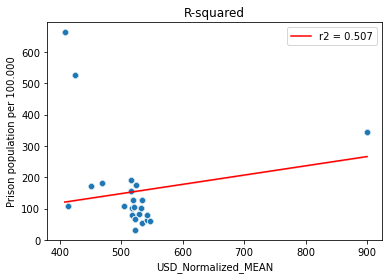

In [134]:
# plotting the data points
sns.scatterplot(x=df['USD_Normalized_MEAN'], y=y)
#plotting the line
sns.lineplot(x=df['USD_Normalized_MEAN'],y=lm.predict(x), color='red', label="r2 = 0.507")
#axes
plt.xlim(380)
plt.ylim(0)
plt.title("R-squared")
# plt.legend("r2", loc="lower right")
plt.show()